In [1]:
#Cargar las librerias necesrias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#from sklearn.linear_model import LinearRegression -> Librería para Regresión Lineal
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# lectura de datos en Python y lo cargamos en la variable Datos

Datos = pd.read_csv(r"C:\Users\ACER\Desktop\regresion.csv")

In [3]:
# Realizamos lectura de los Datos para el análisis exploratorio

Datos.head(50)

,Edad,Sexo,Tipo_dolor_toracico,Presion_arterial_en_reposo,Coresterol_cerico,Azucar_en_la_sangre,Resultados_electrocrdicos,Frecuencua_cardiaca_maxima,Angina_inducida,oldpeak,slope,Numero_de_vasos,thal,Condicion
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [4]:
# Descripción de los datos
Datos.describe()


,Edad,Sexo,Tipo_dolor_toracico,Presion_arterial_en_reposo,Coresterol_cerico,Azucar_en_la_sangre,Resultados_electrocrdicos,Frecuencua_cardiaca_maxima,Angina_inducida,oldpeak,slope,Numero_de_vasos,thal,Condicion
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [ ]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Presion_arterial_en_reposo'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [9]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en preson arterial en reposo: ",Datos['Presion_arterial_en_reposo'].isin([0]).sum())
print("Cantidad de Registros con cero en Coresterol cerico: ",Datos['Coresterol_cerico'].isin([0]).sum())
print("Cantidad de Registros con cero en Frecuencua cardiaca maxima: ",Datos['Frecuencua_cardiaca_maxima'].isin([0]).sum())
print("Cantidad de Registros con cero en depresión del ST inducida por el ejercicio en relación con el reposo: ",Datos['oldpeak'].isin([0]).sum())


Cantidad de Registros con cero en preson arterial en reposo:  0
Cantidad de Registros con cero en Coresterol cerico:  0
Cantidad de Registros con cero en Frecuencua cardiaca maxima:  0
Cantidad de Registros con cero en depresión del ST inducida por el ejercicio en relación con el reposo:  96


In [10]:

Datos['oldpeak']=Datos['oldpeak'].replace(0,Datos['oldpeak'].mean())

In [11]:
print("Cantidad de Registros con cero en depresión del ST inducida por el ejercicio en relación con el reposo: ",Datos['oldpeak'].isin([0]).sum())

Cantidad de Registros con cero en depresión del ST inducida por el ejercicio en relación con el reposo:  0


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

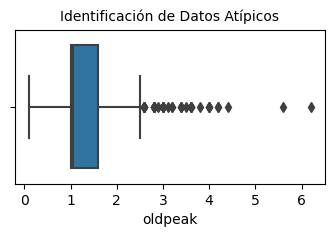

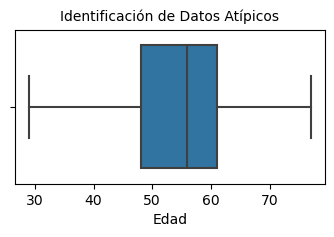

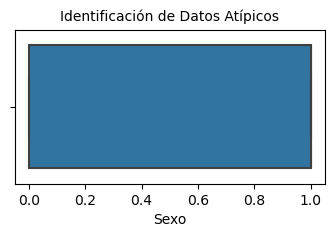

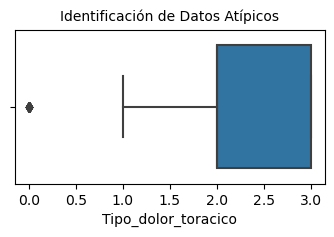

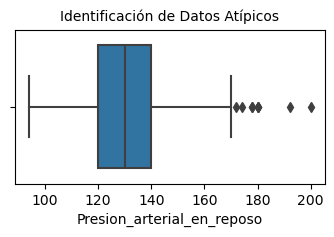

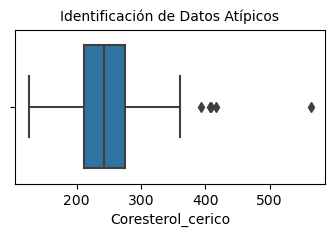

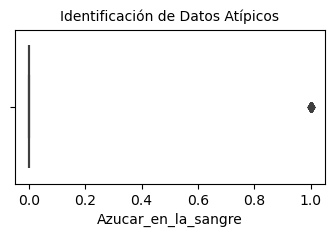

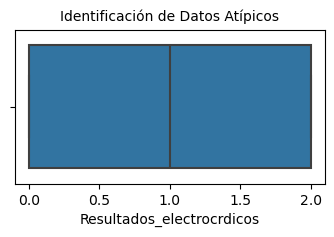

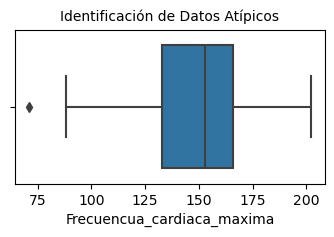

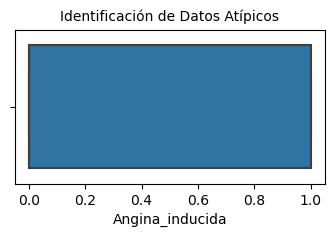

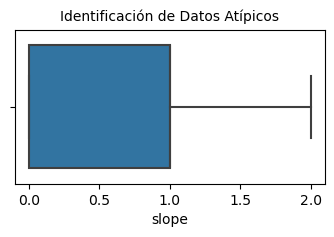

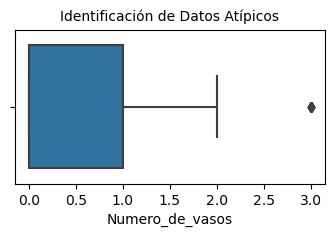

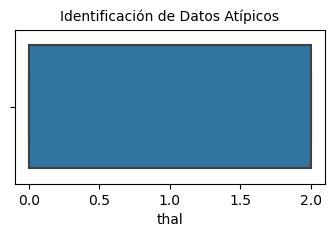

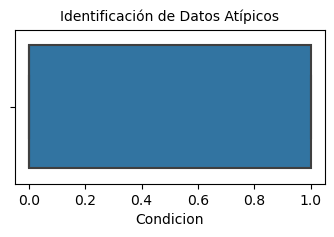

In [14]:
#Identificación de Datos Atípicos

plt.figure(figsize=(4, 2))
sns.boxplot(x=Datos['oldpeak'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )
plt.figure(figsize=(4, 2))
sns.boxplot(x=Datos['Edad'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )
plt.figure(figsize=(4, 2))
sns.boxplot(x=Datos['Sexo'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )
plt.figure(figsize=(4, 2))
sns.boxplot(x=Datos['Tipo_dolor_toracico'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )
plt.figure(figsize=(4, 2))
sns.boxplot(x=Datos['Presion_arterial_en_reposo'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )
plt.figure(figsize=(4, 2))
sns.boxplot(x=Datos['Coresterol_cerico'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )
plt.figure(figsize=(4, 2))
sns.boxplot(x=Datos['Azucar_en_la_sangre'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )
plt.figure(figsize=(4, 2))
sns.boxplot(x=Datos['Resultados_electrocrdicos'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )
plt.figure(figsize=(4, 2))
sns.boxplot(x=Datos['Frecuencua_cardiaca_maxima'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )
plt.figure(figsize=(4, 2))
sns.boxplot(x=Datos['Angina_inducida'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )
plt.figure(figsize=(4, 2))
sns.boxplot(x=Datos['slope'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )
plt.figure(figsize=(4, 2))
sns.boxplot(x=Datos['Numero_de_vasos'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )
plt.figure(figsize=(4, 2))
sns.boxplot(x=Datos['thal'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )
plt.figure(figsize=(4, 2))
sns.boxplot(x=Datos['Condicion'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [16]:
nivel_minimo_oldpeak=0
nivel_maximo_oldpeak=5
Total_Atipicos_oldpeak=((Datos['oldpeak']<nivel_minimo_oldpeak)|(Datos['oldpeak']>nivel_maximo_oldpeak)).sum()
print("El total de datos atípicos de oldpeak es:  {}".format(Total_Atipicos_oldpeak))
nivel_minimo_Presion_arterial_en_reposo=60
nivel_maximo_Presion_arterial_en_reposo=180
Total_Atipicos_Presion_arterial_en_reposo=((Datos['Presion_arterial_en_reposo']<nivel_minimo_Presion_arterial_en_reposo)|(Datos['Presion_arterial_en_reposo']>nivel_maximo_Presion_arterial_en_reposo)).sum()
print("El total de datos atípicos de Presion arterial en reposo es:  {}".format(Total_Atipicos_Presion_arterial_en_reposo))
nivel_minimo_Coresterol_cerico=100
nivel_maximo_Coresterol_cerico=400
Total_Atipicos_Coresterol_cerico=((Datos['Coresterol_cerico']<nivel_minimo_Coresterol_cerico)|(Datos['Coresterol_cerico']>nivel_maximo_Coresterol_cerico)).sum()
print("El total de datos atípicos de Coresterol cerico es:  {}".format(Total_Atipicos_Coresterol_cerico))

El total de datos atípicos de oldpeak es:  2
El total de datos atípicos de Presion arterial en reposo es:  2
El total de datos atípicos de Coresterol cerico es:  4


In [17]:
# Filtra Datos Atípicos

Datos=Datos[(Datos['oldpeak']<nivel_maximo_oldpeak)&(Datos['oldpeak']>nivel_minimo_oldpeak)]
Datos=Datos[(Datos['Presion_arterial_en_reposo']<nivel_maximo_Presion_arterial_en_reposo)&(Datos['Presion_arterial_en_reposo']>nivel_minimo_Presion_arterial_en_reposo)]
Datos=Datos[(Datos['Coresterol_cerico']<nivel_maximo_Coresterol_cerico)&(Datos['Coresterol_cerico']>nivel_minimo_Coresterol_cerico)]


In [18]:
nivel_minimo_oldpeak=0
nivel_maximo_oldpeak=5
Total_Atipicos_oldpeak=((Datos['oldpeak']<nivel_minimo_oldpeak)|(Datos['oldpeak']>nivel_maximo_oldpeak)).sum()
print("El total de datos atípicos de oldpeak es:  {}".format(Total_Atipicos_oldpeak))
nivel_minimo_Presion_arterial_en_reposo=60
nivel_maximo_Presion_arterial_en_reposo=180
Total_Atipicos_Presion_arterial_en_reposo=((Datos['Presion_arterial_en_reposo']<nivel_minimo_Presion_arterial_en_reposo)|(Datos['Presion_arterial_en_reposo']>nivel_maximo_Presion_arterial_en_reposo)).sum()
print("El total de datos atípicos de Presion arterial en reposo es:  {}".format(Total_Atipicos_Presion_arterial_en_reposo))
nivel_minimo_Coresterol_cerico=100
nivel_maximo_Coresterol_cerico=400
Total_Atipicos_Coresterol_cerico=((Datos['Coresterol_cerico']<nivel_minimo_Coresterol_cerico)|(Datos['Coresterol_cerico']>nivel_maximo_Coresterol_cerico)).sum()
print("El total de datos atípicos de Coresterol cerico es:  {}".format(Total_Atipicos_Coresterol_cerico))

El total de datos atípicos de oldpeak es:  0
El total de datos atípicos de Presion arterial en reposo es:  0
El total de datos atípicos de Coresterol cerico es:  0


In [19]:

#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 286 entries, 0 to 296
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Edad                        286 non-null    int64  
 1   Sexo                        286 non-null    int64  
 2   Tipo_dolor_toracico         286 non-null    int64  
 3   Presion_arterial_en_reposo  286 non-null    int64  
 4   Coresterol_cerico           286 non-null    int64  
 5   Azucar_en_la_sangre         286 non-null    int64  
 6   Resultados_electrocrdicos   286 non-null    int64  
 7   Frecuencua_cardiaca_maxima  286 non-null    int64  
 8   Angina_inducida             286 non-null    int64  
 9   oldpeak                     286 non-null    float64
 10  slope                       286 non-null    int64  
 11  Numero_de_vasos             286 non-null    int64  
 12  thal                        286 non-null    int64  
 13  Condicion                   286 non-null

3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características


Característica de interes:ctn enfermedad cardiacaico: si la persona tieenfermedad cardiacates o no (0 = no tieenfermedad cardiacates - 1 = si tieenfermedad cardiacates)
Predecir si una persona puede teenfermedad cardiacaetes

In [21]:
# Total de personas con enfermedad cardiaca

Datos['Condicion'].value_counts()

Condicion
0    157
1    129
Name: count, dtype: int64

4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [22]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = Datos.drop('Condicion',axis=1) # Se cargan los datos de train sin los datos de la columna Diabetico 
Y = Datos['Condicion'] # Se cargan los datos de train con los datos de la la columna Diabetico

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [23]:

print (X_train)

     Edad  Sexo  Tipo_dolor_toracico  Presion_arterial_en_reposo  \
277    45     1                    3                         142   
141    44     1                    2                         120   
252    53     1                    3                         123   
131    48     1                    2                         124   
236    56     1                    3                         125   
..    ...   ...                  ...                         ...   
120    51     1                    2                         110   
166    66     1                    3                         120   
253    53     0                    3                         138   
204    60     1                    3                         130   
170    65     0                    3                         150   

     Coresterol_cerico  Azucar_en_la_sangre  Resultados_electrocrdicos  \
277                309                    0                          2   
141                226             


5. Entrenar el modelo configurando los diferentes hiperparámetros

In [24]:
# Construir el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [25]:
print (Y_test)

257    1
63     0
195    1
71     0
77     0
      ..
225    1
196    1
219    1
217    1
214    1
Name: Condicion, Length: 72, dtype: int64


In [26]:
print (Prediccion)

[0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1]


6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

In [27]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87        40
           1       0.92      0.72      0.81        32

    accuracy                           0.85        72
   macro avg       0.86      0.83      0.84        72
weighted avg       0.86      0.85      0.84        72




7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

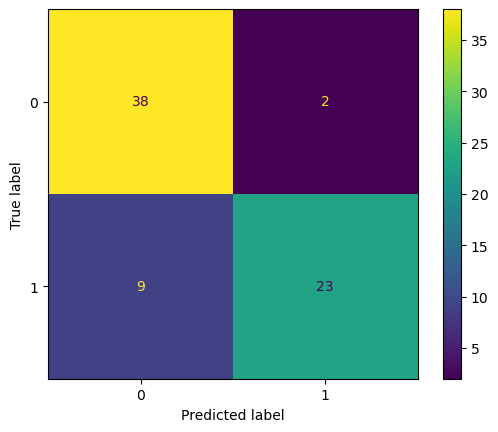

In [28]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

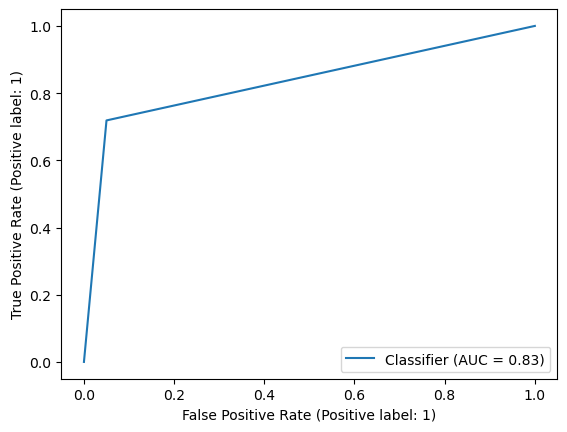

In [29]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()


8. Interpretar, analizar y documentar los resultados obtenidos
Del desempeño del modelo se puede describir:
Precisión: Precisión mide la proporción de predicciones positivas verdaderas entre todas las predicciones positivas realizadas por el modelo. Aquí la precisión para la clase "Condicion" es 0,92, lo que significa que el 92% de los predichos como enfermo cardiaco por el modelo eran en realidad enfermo cardiaco.

Recall: Mide la proporción de predicciones positivas verdaderas entre todas las instancias positivas reales en el conjunto de datos. Aquí el Recall para la clase "diabético" es 7257, lo que indica que el modelo identificó correctamente a7257% de todos loenfermos cardiacosos.

F1 Score: Es la media armónica de precisión y recuperación. Proporciona una puntuación única que equilibra la Precisión y Recall. Aquí la puntuación F1 para la clase "diabética" e8 0,61, lo que indica un equilibrio entre precisión y recuerdo.

De la Matriz de Confusión podemos interpretar:

Verdaderos negativos: el recuento de observaciones que un clasificador predijo correctamente com38also 109

Verdaderos positivos: el recuento de observaciones que un clasificador predijo correctamente como 23rdadero 36

Falsos positivos: el recuento de observaciones que un clasificador predijo incorrectamente como2erdaderas 15

Falsos negativos: el recuento de observaciones que un clasificador predijo incorrectamen9
 como falso 31

De la curva de precisión del modelo se puede interpreta83

El AUC es 0,69 lo que83ignifica que el 69 % de las predicciones del clasificador son correctas en todos los umbrales de clasificación.